In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_classification
from sklearn.neighbors import NearestNeighbors

from matplotlib.gridspec import GridSpec
import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import plotly.express as px
%matplotlib inline

## Thủ môn

In [2]:
players = pd.read_csv('data_chua_chuan_hoa.csv') 

In [3]:
players = players[players['pos_G']==0]
players = players.drop(['pos_G'], axis=1)
players

,market_value,age,height,preferred_foot,attacking,technical,tactical,defending,creativity,saves,anticipation,ball_distribution,aerial,avg_score_last_12_months,appearances_last_12_months,point_of_tournament,pos_D,pos_F,pos_M
0,7400,22,189,1,68,55,51,33,49,0,0,0,0,7.14,33,1858.00,0,1,0
1,2500,25,179,2,62,48,54,32,47,0,0,0,0,6.86,37,1858.00,0,1,0
2,1200,22,184,2,64,51,45,29,48,0,0,0,0,6.80,34,1858.00,0,1,0
3,2900,22,182,1,58,60,47,38,59,0,0,0,0,6.88,37,1858.00,0,0,1
4,1200,28,187,2,55,50,41,33,44,0,0,0,0,6.82,38,1858.00,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11809,230,27,175,1,38,50,40,47,42,0,0,0,0,6.89,22,973.14,1,0,0
11810,220,29,177,2,50,61,40,42,51,0,0,0,0,7.00,16,973.14,0,0,1
11811,190,24,189,2,55,46,47,33,37,0,0,0,0,6.67,11,925.40,0,1,0
11812,130,30,177,2,50,48,43,41,50,0,0,0,0,6.83,18,905.30,0,0,1


In [7]:
players.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11021 entries, 0 to 11813
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   market_value                11021 non-null  int64  
 1   age                         11021 non-null  int64  
 2   height                      11021 non-null  int64  
 3   preferred_foot              11021 non-null  int64  
 4   attacking                   11021 non-null  int64  
 5   technical                   11021 non-null  int64  
 6   tactical                    11021 non-null  int64  
 7   defending                   11021 non-null  int64  
 8   creativity                  11021 non-null  int64  
 9   saves                       11021 non-null  int64  
 10  anticipation                11021 non-null  int64  
 11  ball_distribution           11021 non-null  int64  
 12  aerial                      11021 non-null  int64  
 13  avg_score_last_12_months    11021 no

In [8]:
neighbors = 38

## Hàm plot

In [9]:
def _plot_kmean_scatter(X, labels, gs, thres): 
    # lựa chọn màu sắc
    num_classes = len(np.unique(labels))
    palette = np.array(sns.color_palette("hls", num_classes))

    # vẽ biểu đồ scatter
    ax = plt.subplot(gs)
    sc = ax.scatter(X[:,0], X[:,1], c=palette[labels.astype(np.int64)])

    # thêm nhãn cho mỗi cluster
    txts = []

    for i in range(num_classes):
        # Vẽ text tên cụm tại trung vị của mỗi cụm
        indices = (labels == i)
        xtext, ytext = np.median(X[indices, :], axis=0)
        if not (np.isnan(xtext) or np.isnan(ytext)):        
            txt = ax.text(xtext, ytext, str(i), fontsize=24) 
            txts.append(txt)
    plt.title('t-sne visualization for thres={:.4f}'.format(thres))

## Chuẩn hóa standard
___

In [10]:
X = players
X_std = StandardScaler().fit_transform(X) 
X_std

array([[ 0.39997304, -1.22865328,  1.33490026, ..., -0.7640056 ,
         2.01095398, -0.87418924],
       [-0.1111177 , -0.52332002, -0.16240634, ..., -0.7640056 ,
         2.01095398, -0.87418924],
       [-0.24671321, -1.22865328,  0.58624696, ..., -0.7640056 ,
         2.01095398, -0.87418924],
       ...,
       [-0.35206048, -0.75843111,  1.33490026, ..., -0.7640056 ,
         2.01095398, -0.87418924],
       [-0.35831874,  0.65223539, -0.46186767, ..., -0.7640056 ,
        -0.49727642,  1.14391708],
       [-0.35727569, -0.75843111, -0.76132899, ..., -0.7640056 ,
         2.01095398, -0.87418924]])

Text(0.5, 1.0, 'Sorting Maximum Distance in k Nearest Neighbor of kNN')

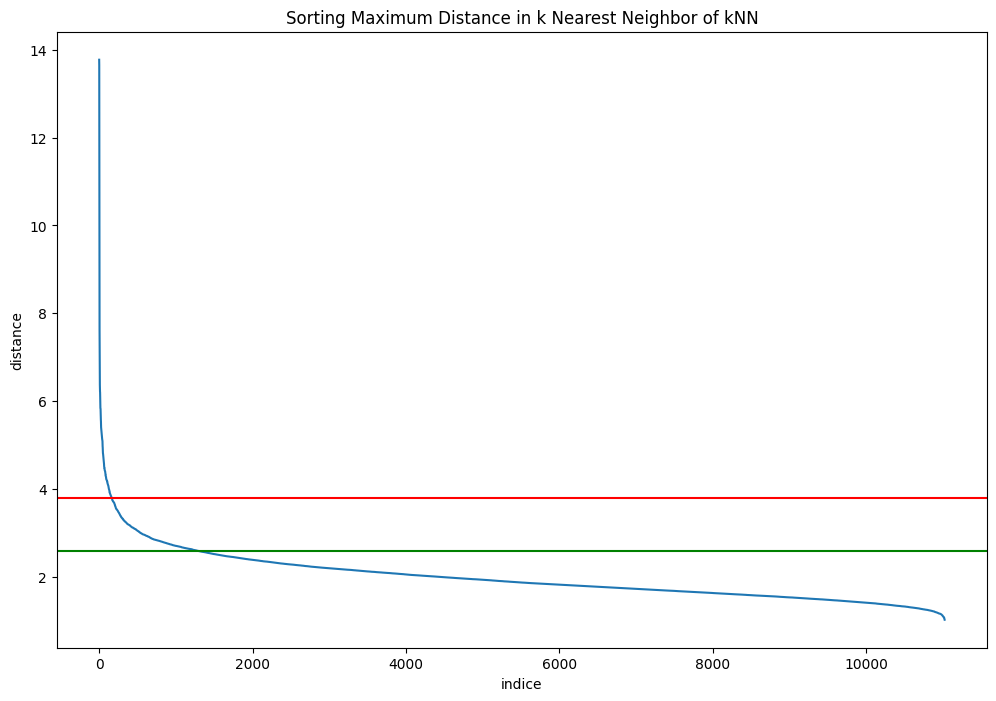

In [13]:
# X_std = X_std
# neighbors = 42
nbrs = NearestNeighbors(n_neighbors=neighbors ).fit(X_std)

# Ma trận khoảng cách distances: (N, k)
distances, indices = nbrs.kneighbors(X_std)

# Lấy ra khoảng cách xa nhất từ phạm vi láng giềng của mỗi điểm và sắp xếp theo thứ tự giảm dần.
distance_desc = sorted(distances[:, neighbors-1], reverse=True)

# Vẽ biểu đồ khoảng cách xa nhất ở trên theo thứ tự giảm dần
plt.figure(figsize=(12, 8))
plt.plot(list(range(1,len(distance_desc )+1)), distance_desc)
plt.axhline(y=3.8,color='red')
# plt.text(2, 0.6, 'y = 0.7',fontsize=8,)
plt.axhline(y=2.6, color='green')
# plt.text(2, 0.5, 'y = 0.45', fontsize=8)
plt.ylabel('distance')
plt.xlabel('indice')
plt.title('Sorting Maximum Distance in k Nearest Neighbor of kNN')

### PCA

4 4 4 4 3 3 3 2 2 2 2 2 

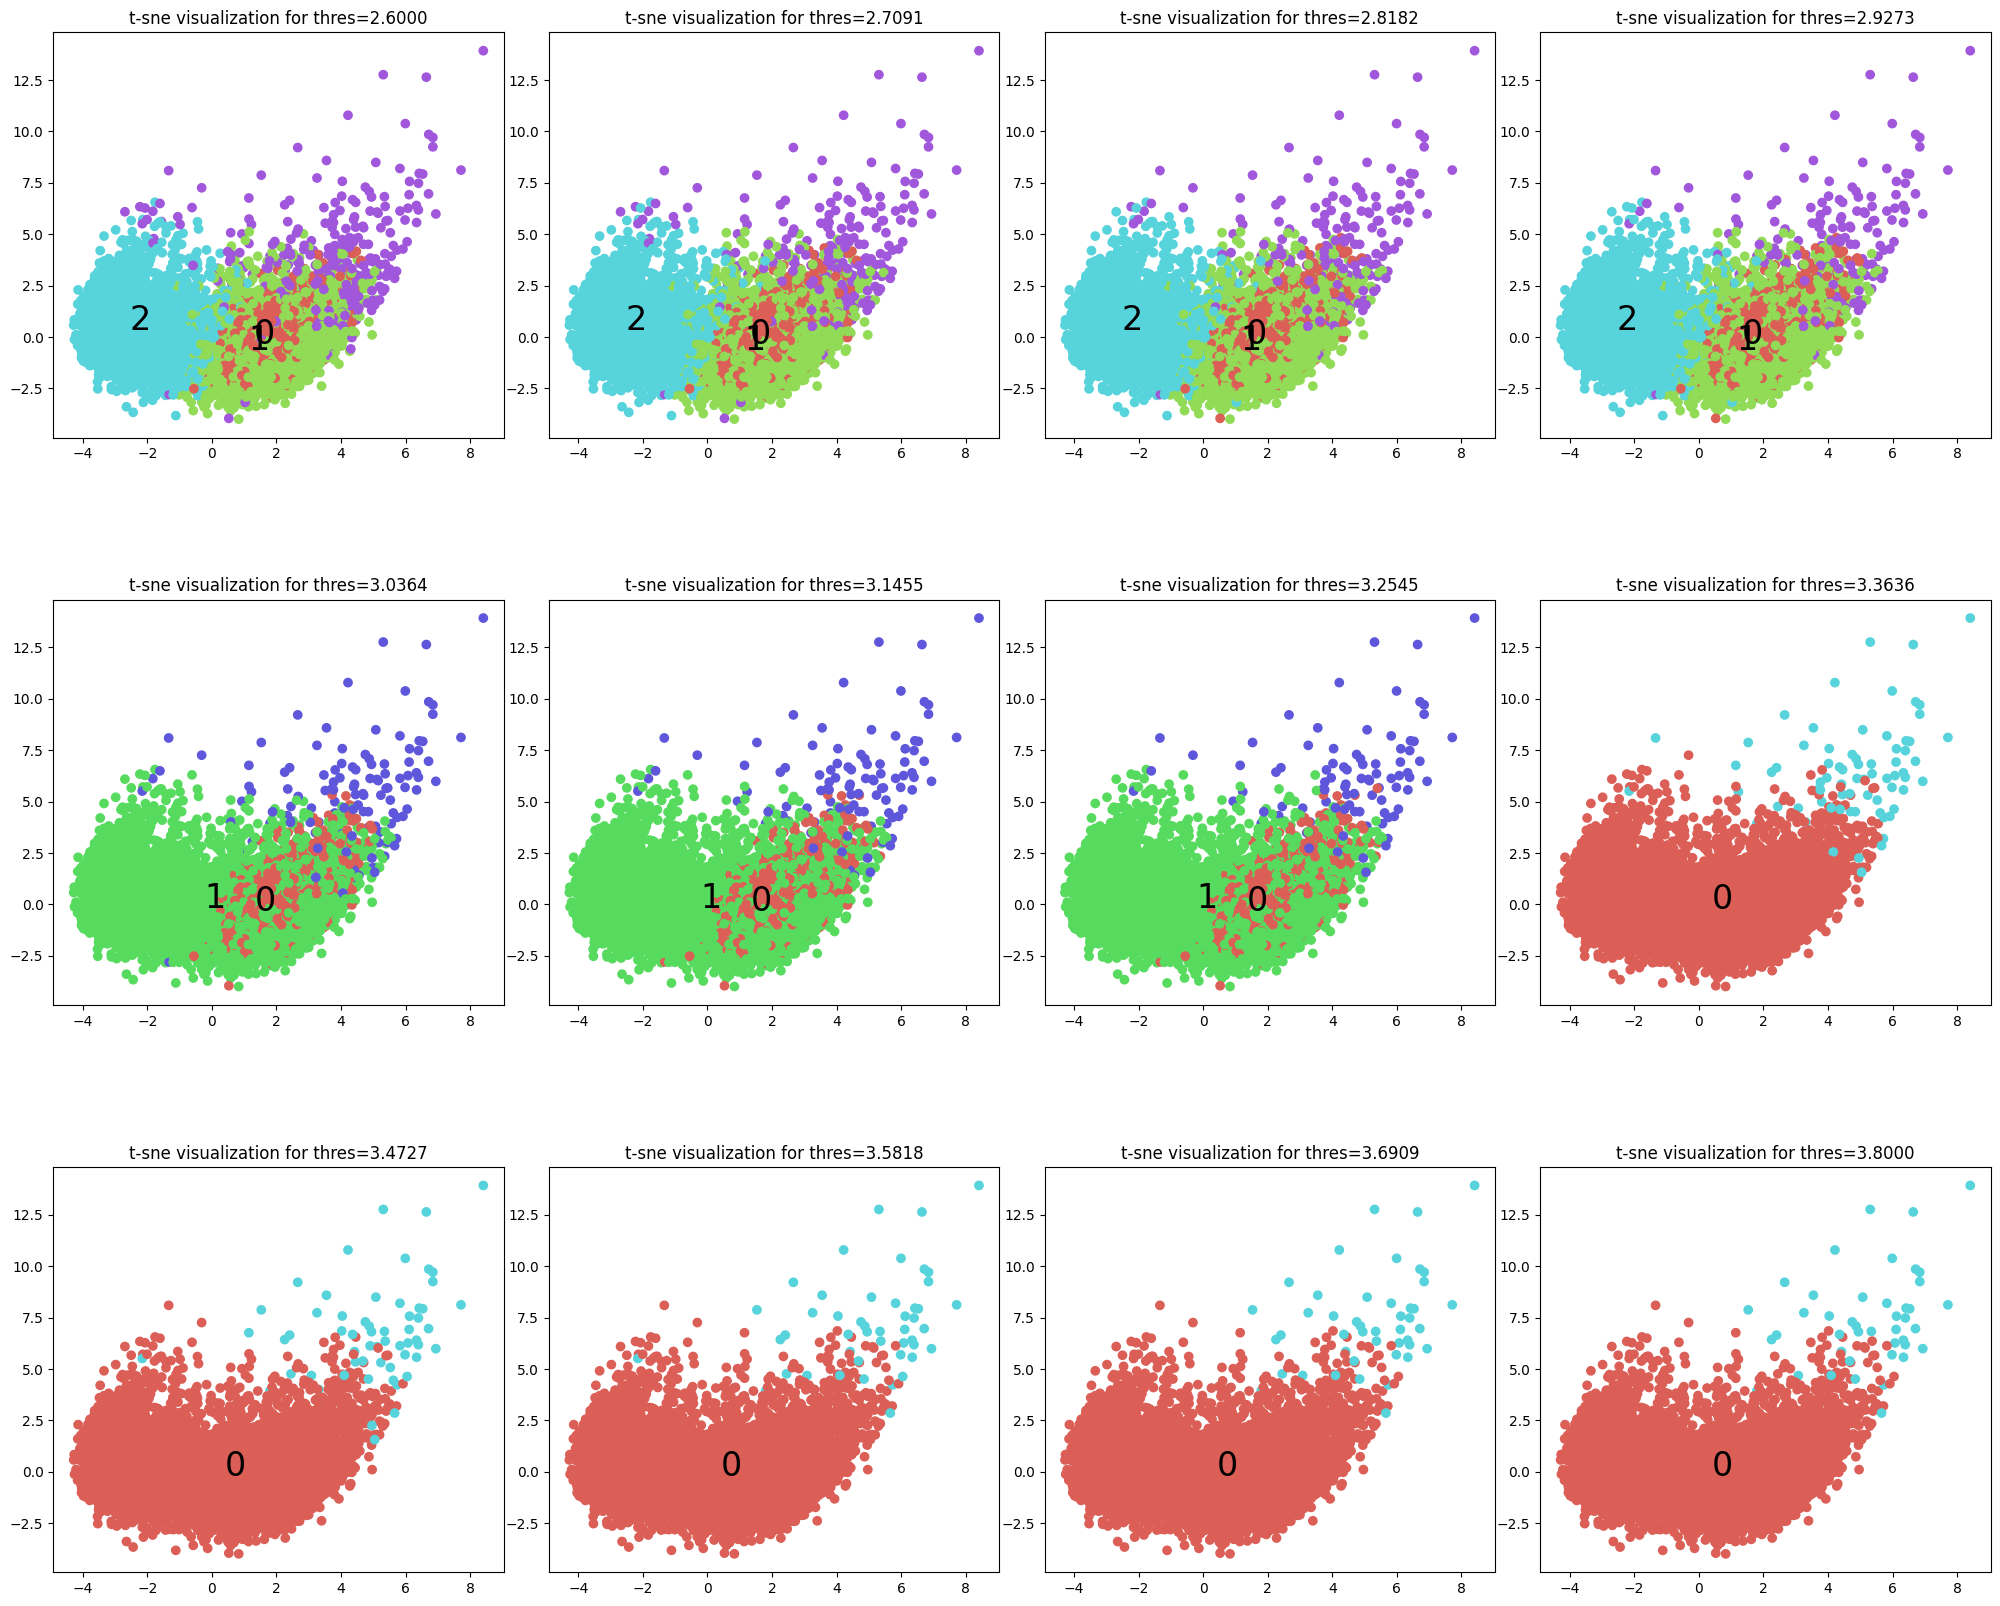

In [14]:
gs = GridSpec(3, 4) 
plt.figure(figsize = (25, 20))
plt.subplots_adjust(wspace=0.1,hspace=0.4)
# X_std = X_std_df.values
for i, thres in enumerate(np.linspace(2.6, 3.8, 12)):
    dbscan = DBSCAN(eps=thres, min_samples=neighbors+1)
    dbscan.fit(X_std)
    labels = dbscan.fit_predict(X_std) 
    print(len(np.unique(labels)),end=' ')
    pca = PCA(n_components=2).fit_transform(X_std)   
    _plot_kmean_scatter(pca , labels, gs[i], thres) 

### T-SNE

4 4 4 4 3 3 3 2 2 2 2 2 

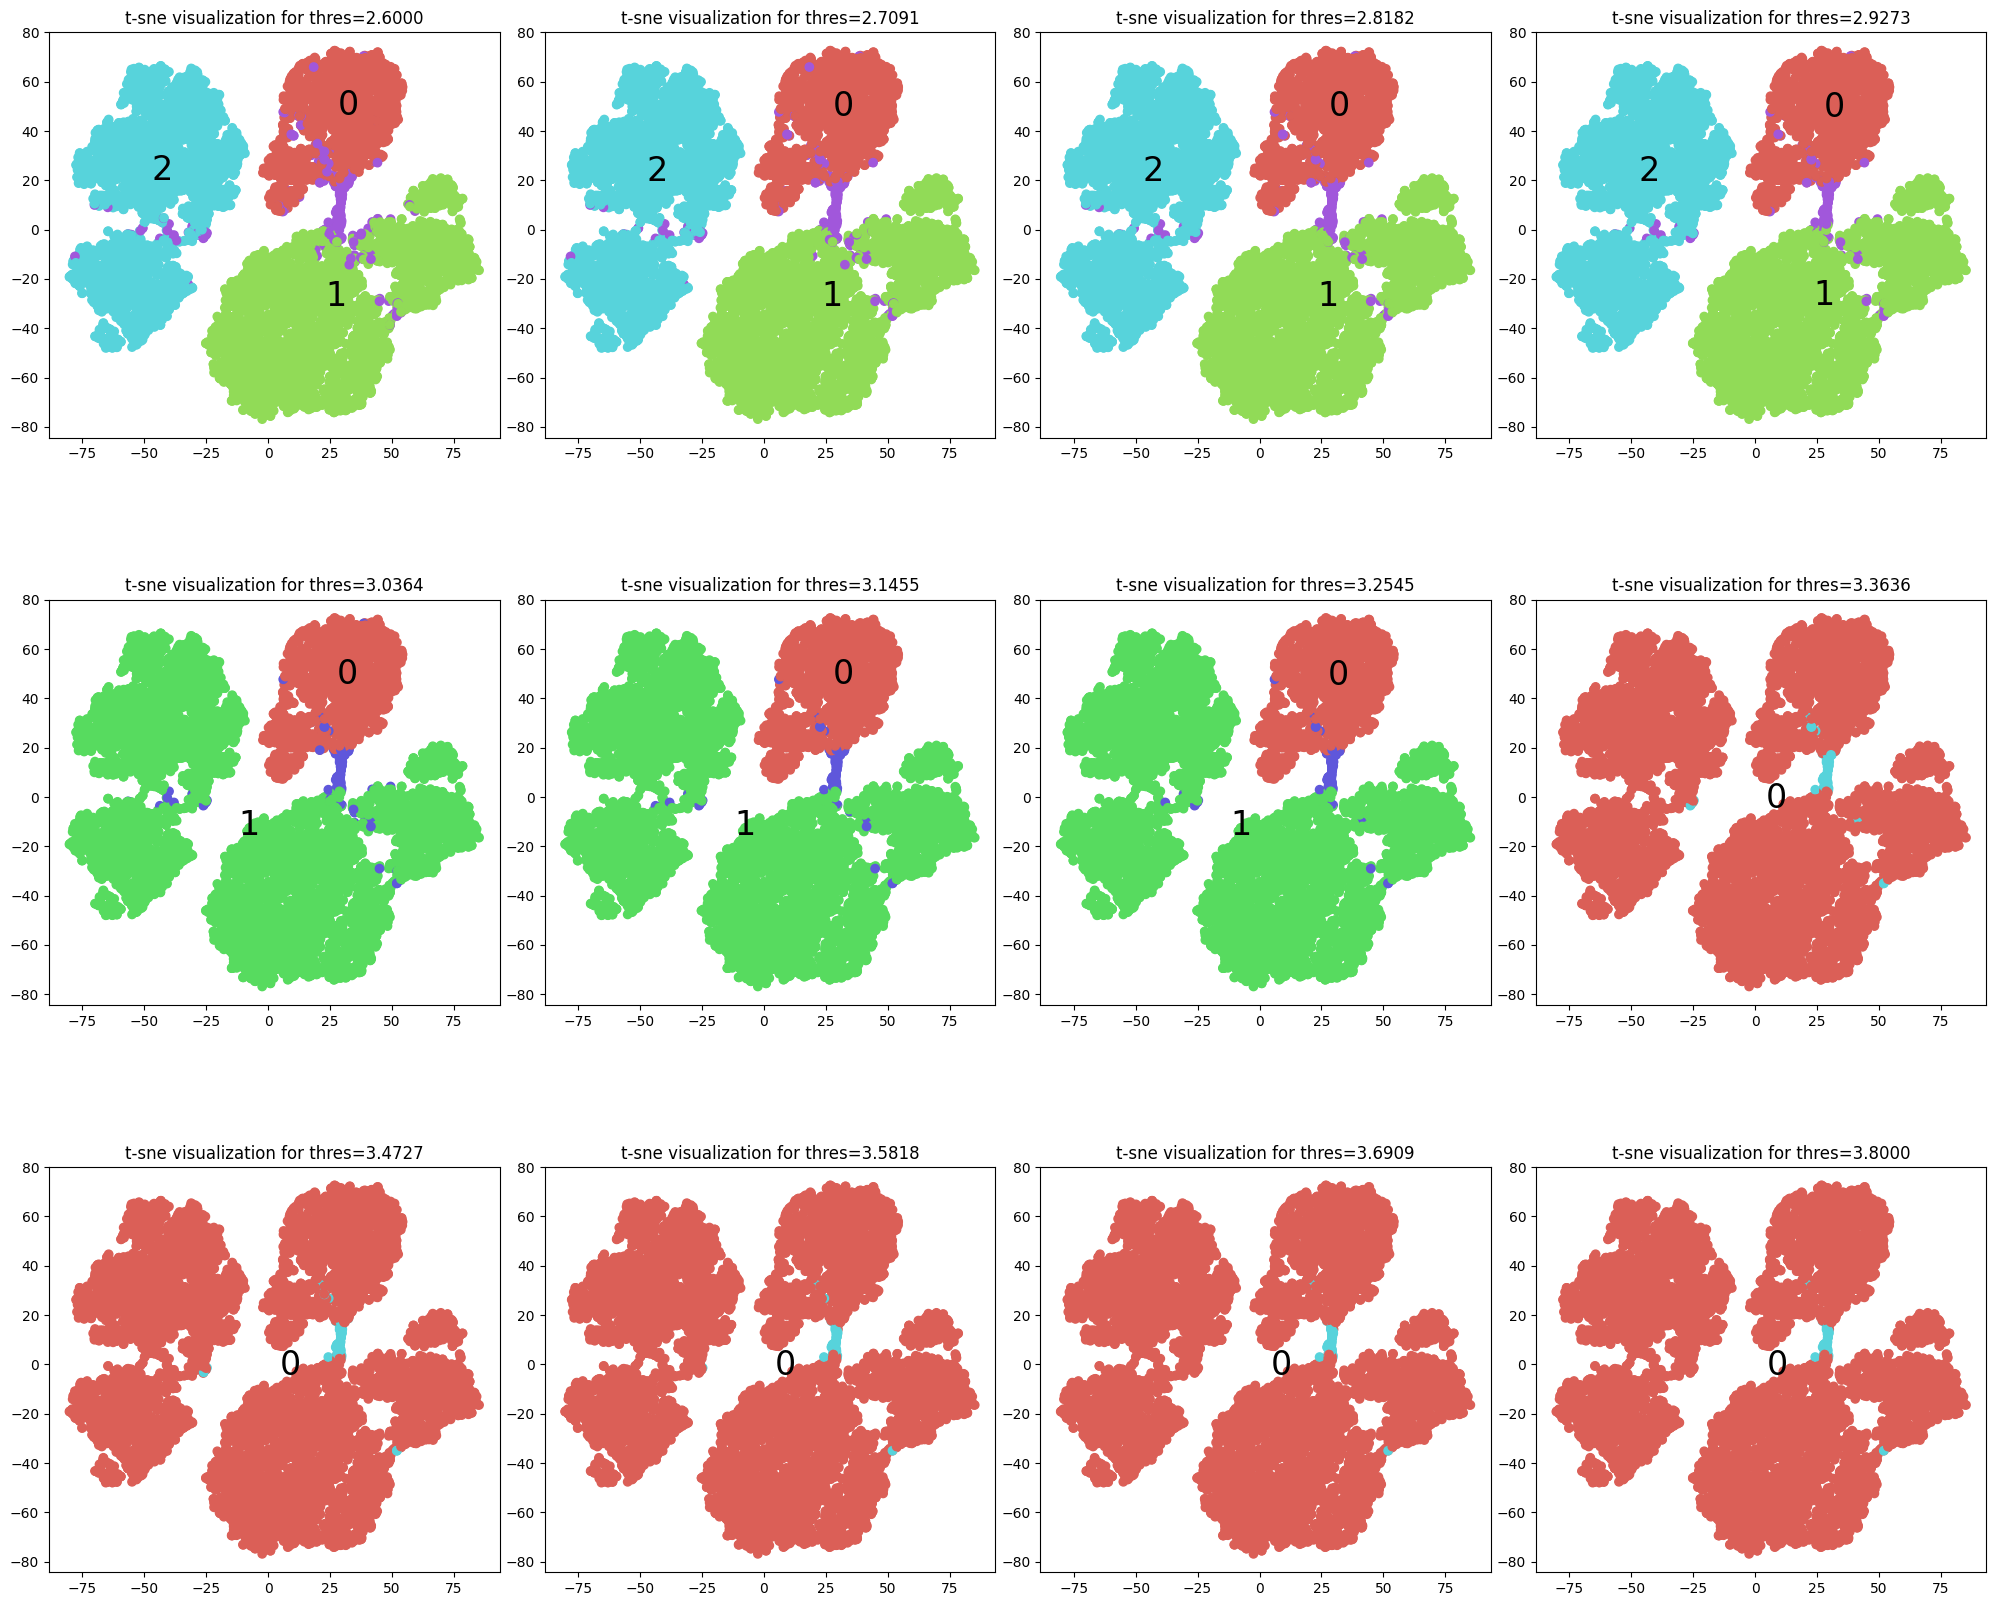

In [15]:
gs = GridSpec(3, 4) 
plt.figure(figsize = (25, 20))
plt.subplots_adjust(wspace=0.1,hspace=0.4)
# X_std = X_std_df.values
tsne = TSNE(n_components=2, random_state=42).fit_transform(X_std)  
for i, thres in enumerate(np.linspace(2.6, 3.8, 12)):
    dbscan = DBSCAN(eps=thres, min_samples=neighbors+1)
    dbscan.fit(X_std)
    labels = dbscan.fit_predict(X_std) 
    print(len(np.unique(labels)),end=' ')
    _plot_kmean_scatter(tsne , labels, gs[i], thres) 

## Chuẩn hóa minmax
___

In [16]:
X = players
X_std = MinMaxScaler().fit_transform(X) 

Text(0.5, 1.0, 'Sorting Maximum Distance in k Nearest Neighbor of kNN')

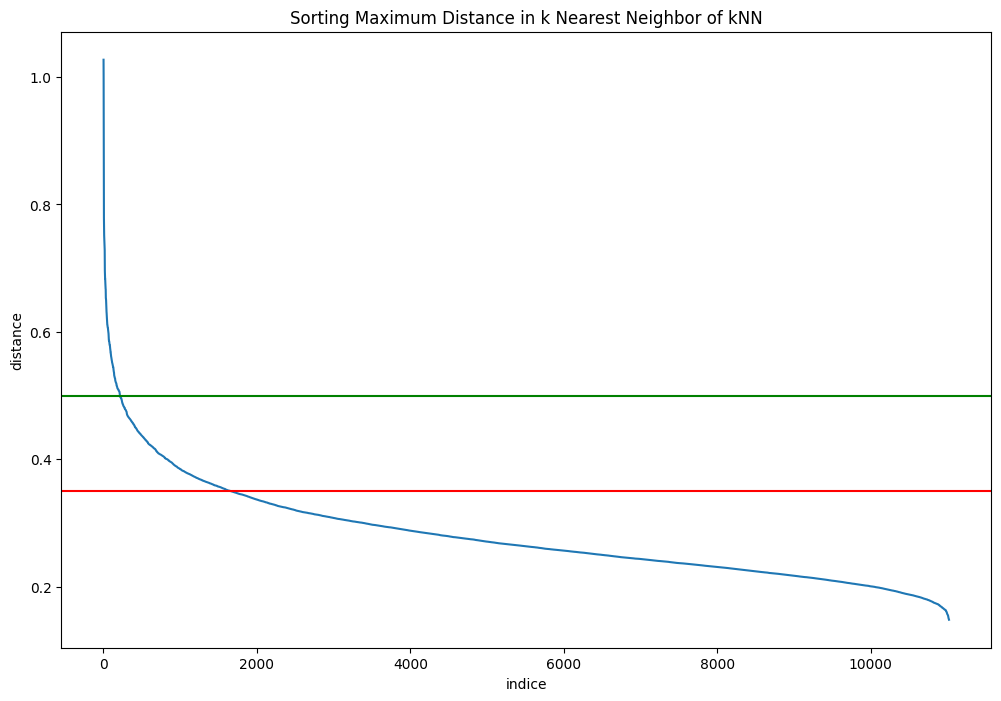

In [18]:
# X_std = X_std
# neighbors = 42
nbrs = NearestNeighbors(n_neighbors=neighbors ).fit(X_std)

# Ma trận khoảng cách distances: (N, k)
distances, indices = nbrs.kneighbors(X_std)

# Lấy ra khoảng cách xa nhất từ phạm vi láng giềng của mỗi điểm và sắp xếp theo thứ tự giảm dần.
distance_desc = sorted(distances[:, neighbors-1], reverse=True)

# Vẽ biểu đồ khoảng cách xa nhất ở trên theo thứ tự giảm dần
plt.figure(figsize=(12, 8))
plt.plot(list(range(1,len(distance_desc )+1)), distance_desc)
plt.axhline(y=0.35,color='red')
# plt.text(2, 0.6, 'y = 0.7',fontsize=8,)
plt.axhline(y=0.5, color='green')
# plt.text(2, 0.5, 'y = 0.45', fontsize=8)
plt.ylabel('distance')
plt.xlabel('indice')
plt.title('Sorting Maximum Distance in k Nearest Neighbor of kNN')

### PCA

10 10 10 10 10 10 10 10 10 10 10 10 

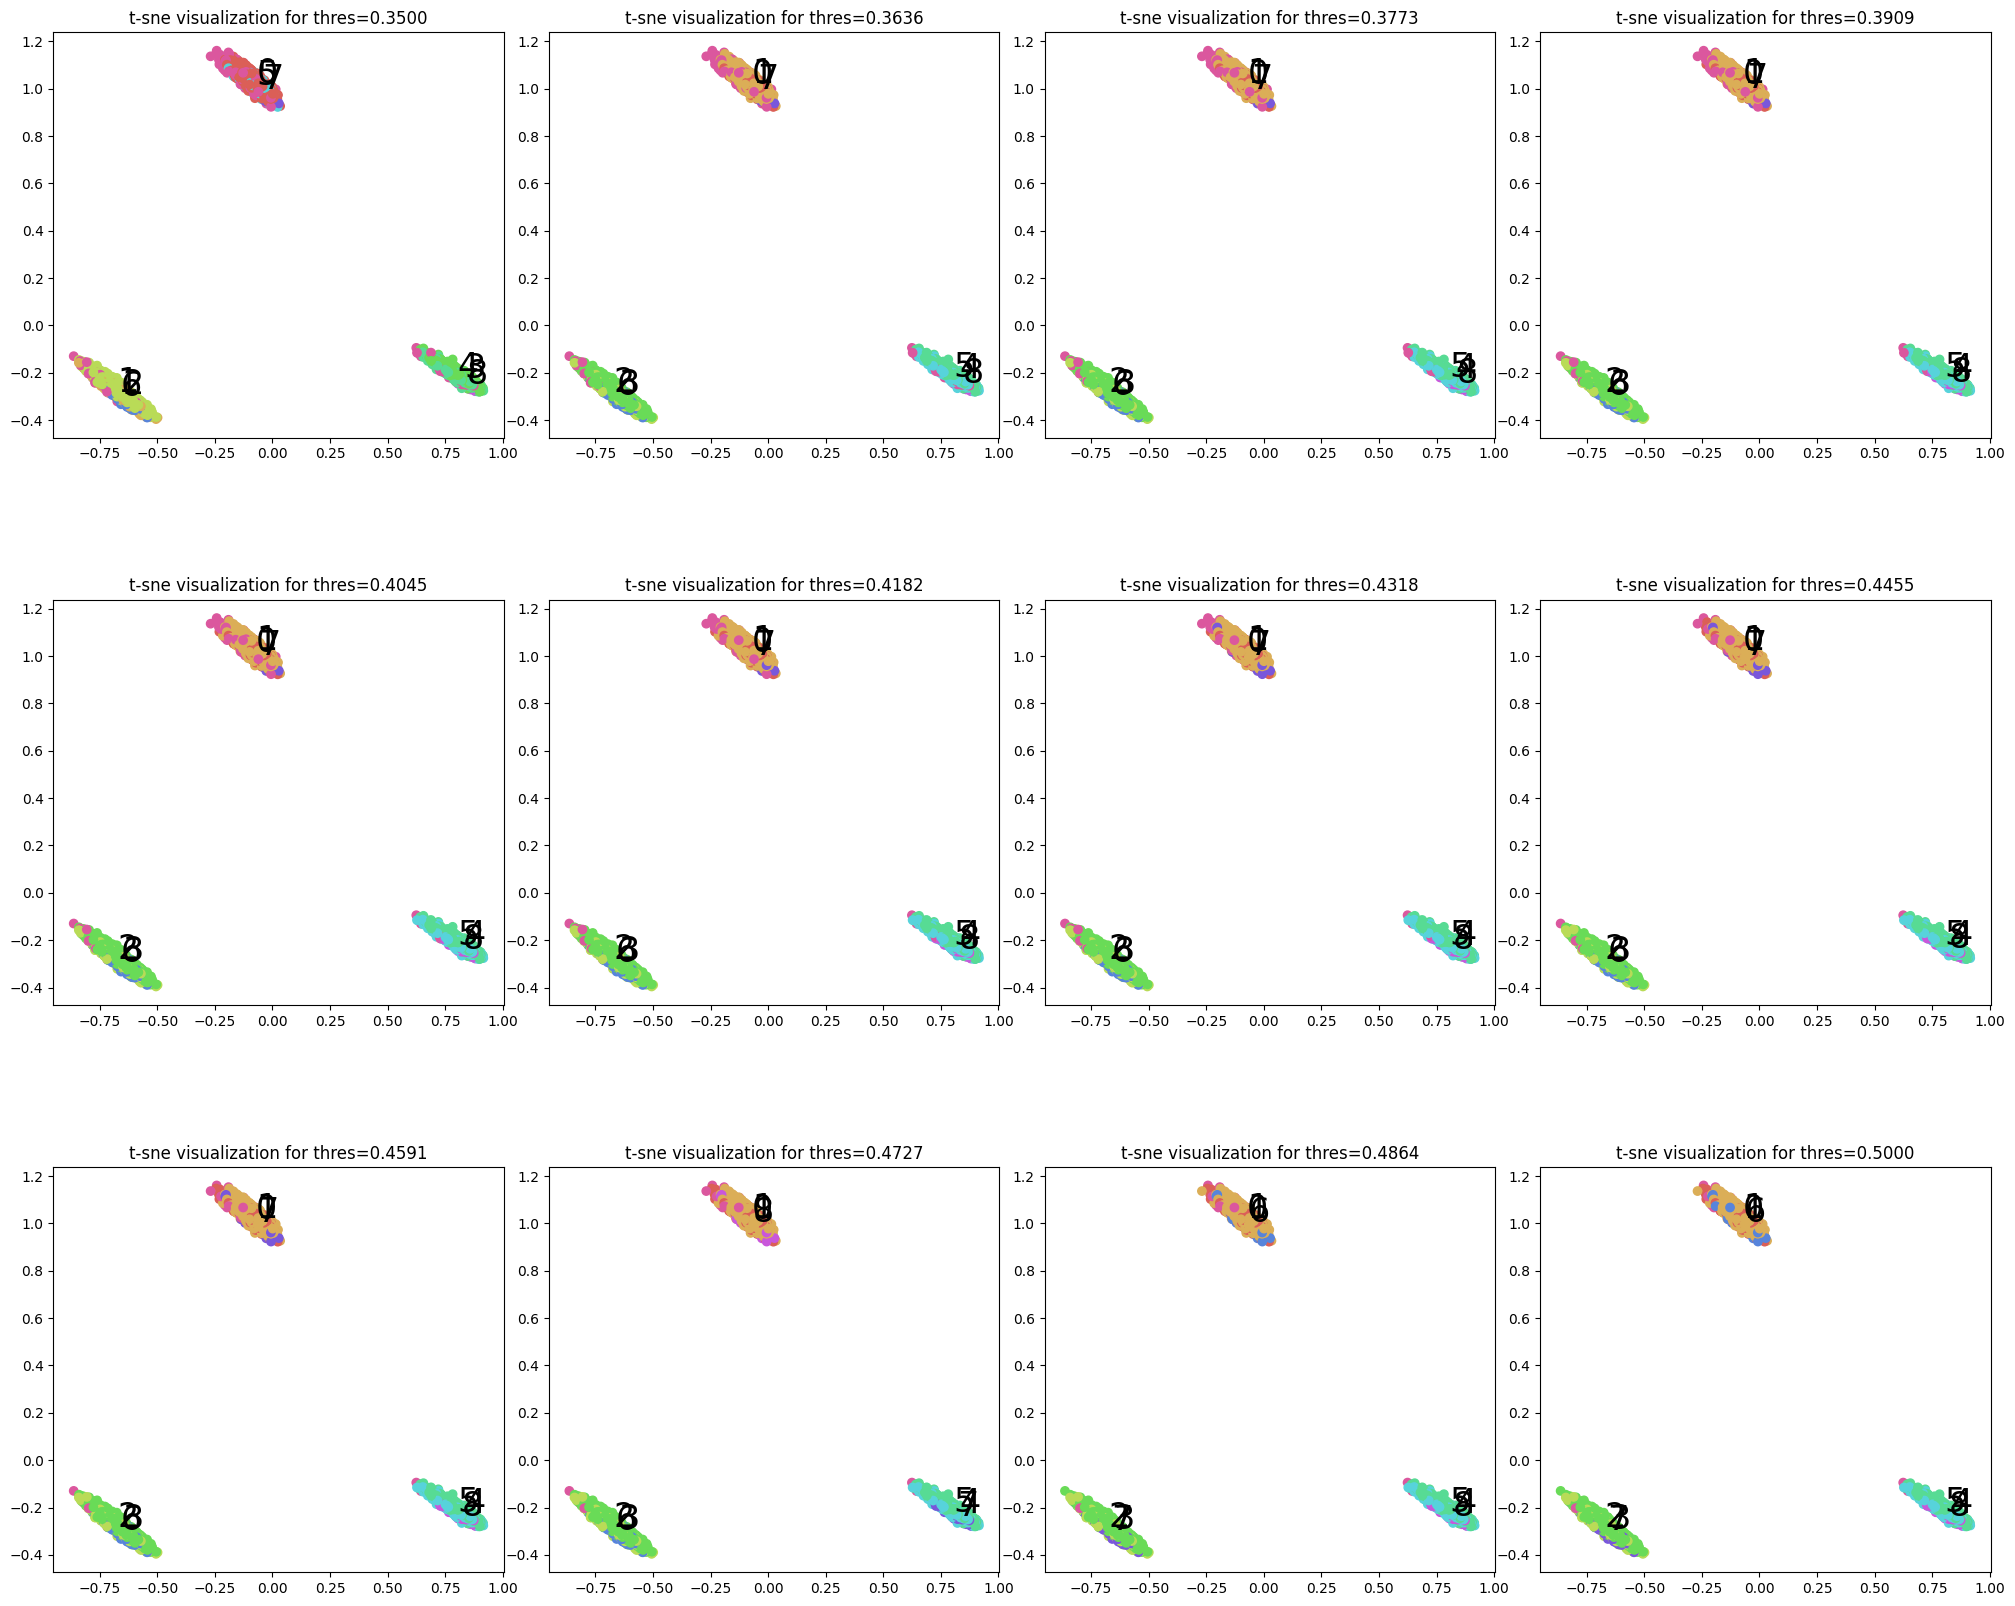

In [19]:
gs = GridSpec(3, 4) 
plt.figure(figsize = (25, 20))
plt.subplots_adjust(wspace=0.1,hspace=0.4)
# X_std = X_std_df.values
for i, thres in enumerate(np.linspace(0.35, 0.5, 12)):
    dbscan = DBSCAN(eps=thres, min_samples=neighbors+1)
    dbscan.fit(X_std)
    labels = dbscan.fit_predict(X_std) 
    print(len(np.unique(labels)),end=' ')
    pca = PCA(n_components=2).fit_transform(X_std)   
    _plot_kmean_scatter(pca , labels, gs[i], thres) 

### T-SNE

10 10 10 10 10 10 10 10 10 10 10 10 

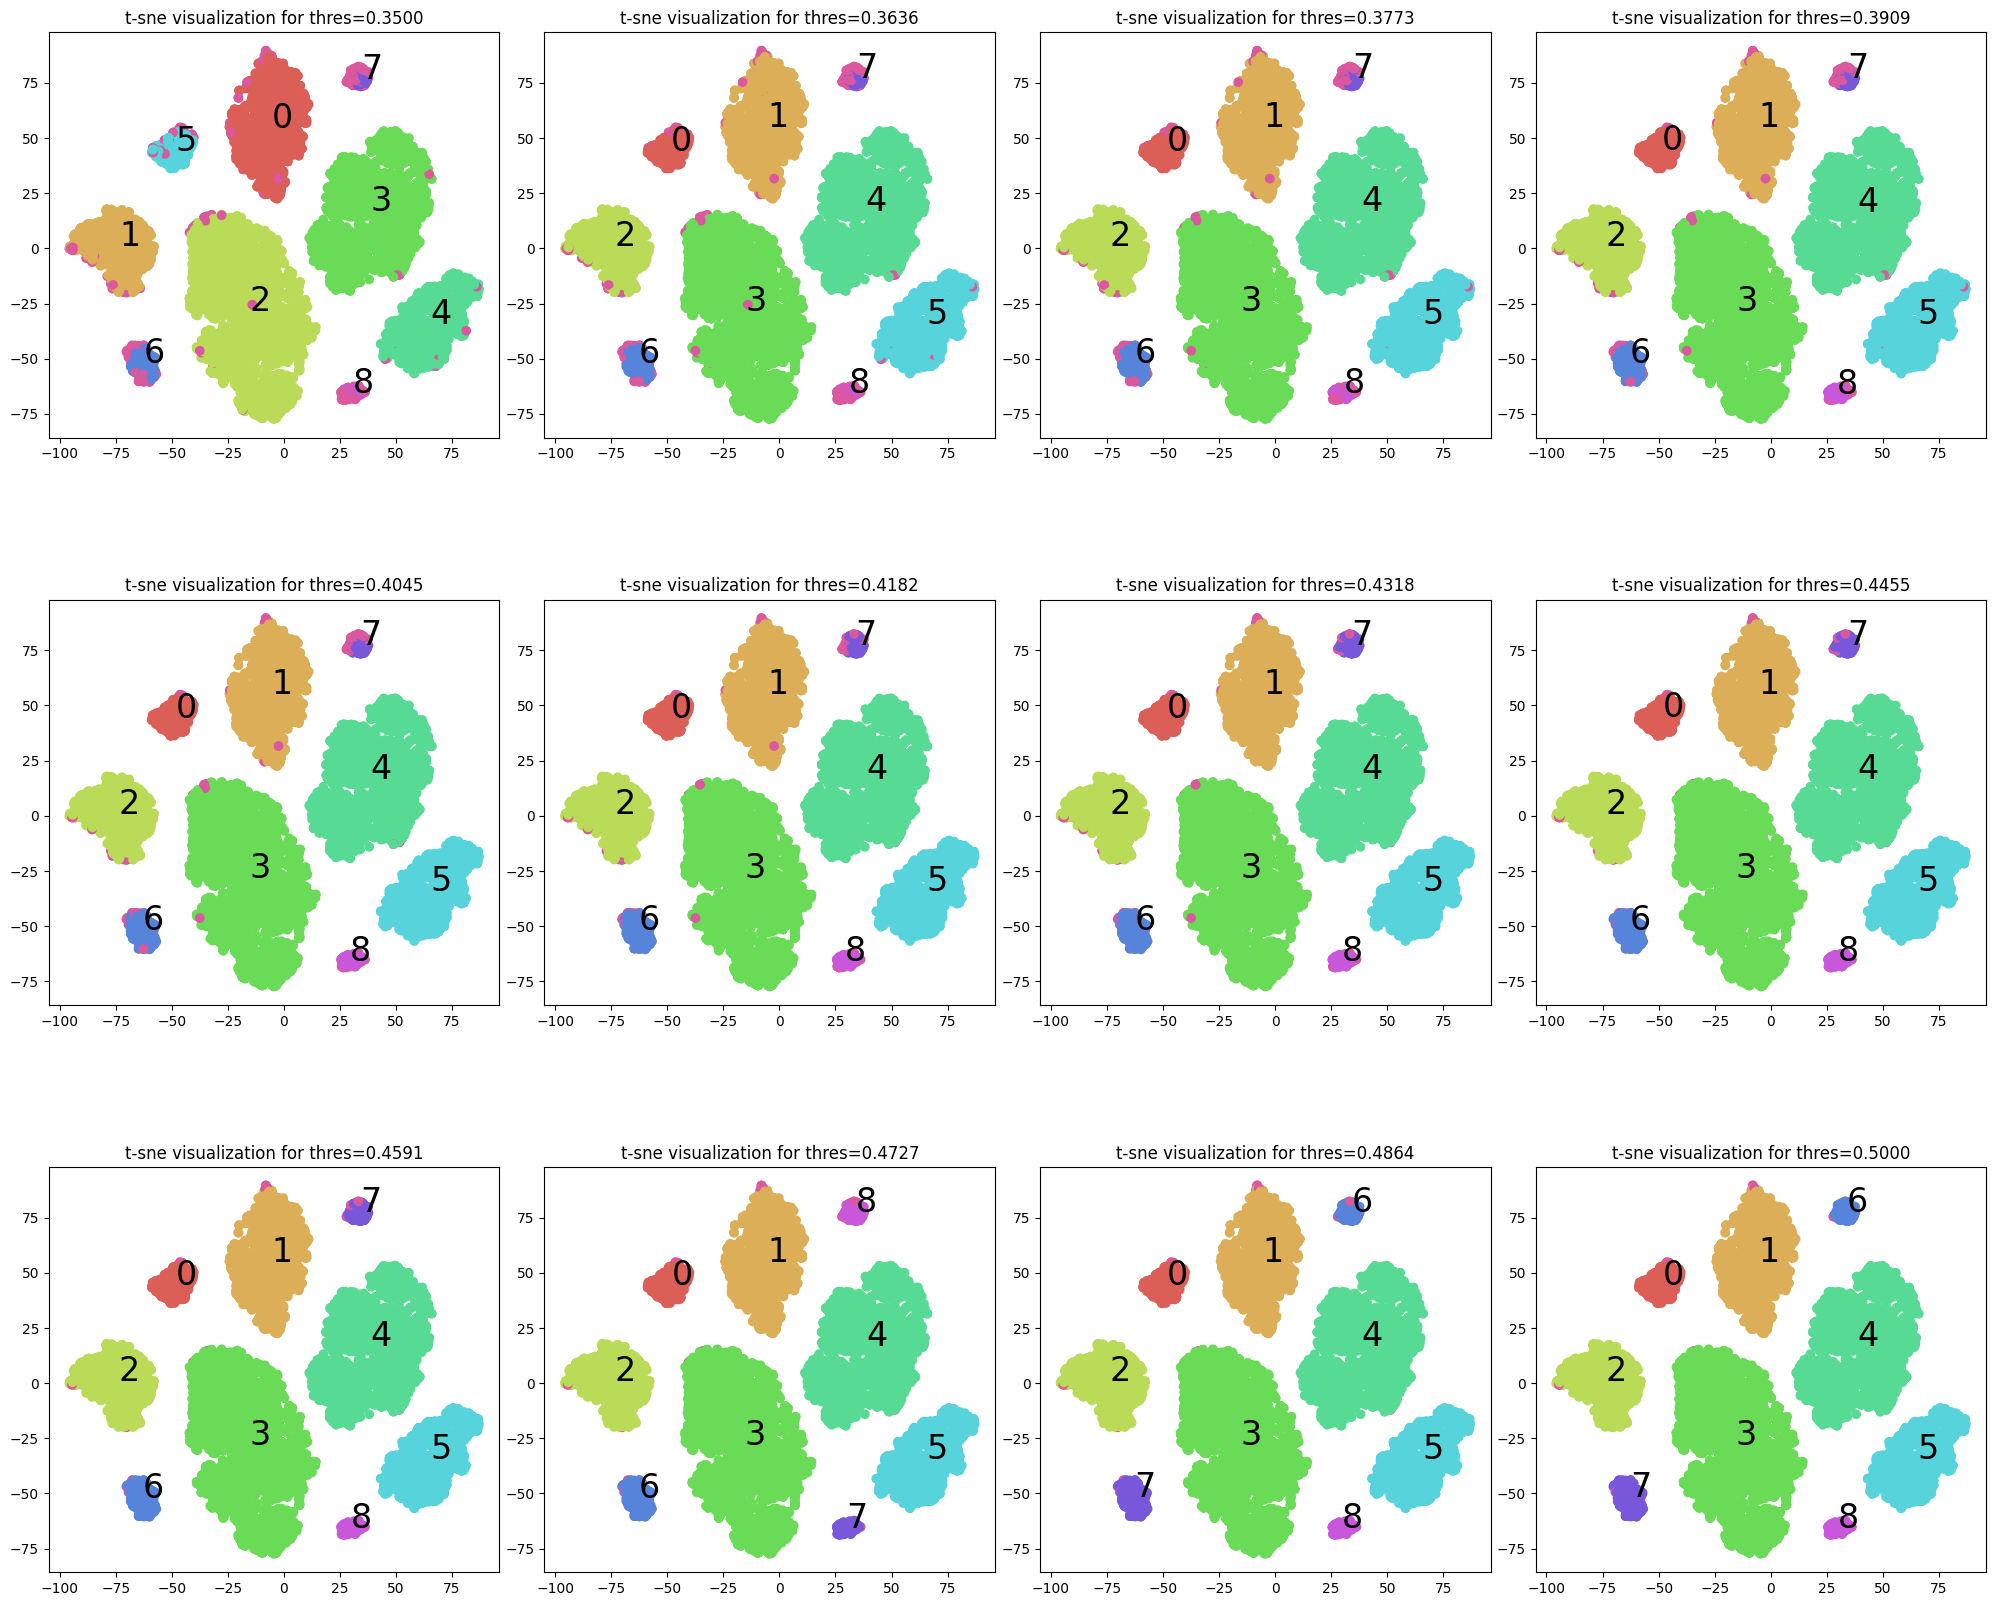

In [20]:
gs = GridSpec(3, 4) 
plt.figure(figsize = (25, 20))
plt.subplots_adjust(wspace=0.1,hspace=0.4)
# X_std = X_std_df.values
tsne = TSNE(n_components=2, random_state=42).fit_transform(X_std)  
for i, thres in enumerate(np.linspace(0.35, 0.5, 12)):
    dbscan = DBSCAN(eps=thres, min_samples=neighbors+1)
    dbscan.fit(X_std)
    labels = dbscan.fit_predict(X_std) 
    print(len(np.unique(labels)),end=' ')
    _plot_kmean_scatter(tsne , labels, gs[i], thres) 